## 5. Nižji standardi

V tem razdelku omejimo stroge pogoje, da smo zadovoljni le z najbolšim kandidatom.

Pri prejšnjih poskusih smo bili zadovoljni, le če smo nakoncu izbrali najbolšega partnerja. Pri tem smo bili dokaj uspešni, saj smo z pravim modelom izbrali najbolšega kandidata skoraj tretino časa.

To je sicer super rezultat, ampak če je aternativa, da v preostalih dveh tretinah ne najdemo partnerja, se najbž nihče ne bi odločil za to strategijo.

V realnosti ni res, da smo zadovoljni samo z najbolšo izbiro vse ostale pa vržemo v isti koš. Zato v tem poglabju raziščemo druge načine ocenjevanja uspešnosti modela.

1. Sprostimo omejitev za p %. (Pomeni, da smo zadovoljni, če je naš izbrani kandidat v top p % vseh kandidatov.)  

2. Z izbrano osebo smo zadovoljni točno toliko, kot je njena ocena. (Za ugotovitev uspešnosti računamo povprečje po vseh izbranih kandidatih.)

3. Je kombinacija zgornjih dveh. (Zadovoljni smo le z najbolšimi p % kandidatov ter na njih povprečimo.)

### 5.1

V tem podpoglavju raziščemo prvo strategijo opisano zgoraj.

In [34]:
import numpy as np
import porocni_problem as fun
import random
import matplotlib.pyplot as plt

n = 100 # število kandidatk
m = 30000 #kolikokrat poženemo proces iskanja najbolšega partnerja

tabela_partnerjev = {}
for i in range(m):
    partnerji = list(range(1,n+1))
    random.shuffle(partnerji)
    tabela_partnerjev[i] = partnerji

In [35]:
p = 0.1

In [36]:
alfa = 1.8 #kasneje vidimo, da se to najbolj splača

In [37]:
vsotke = [0] * n
vsotke_pov = [0] * n
dovolj_dober = n*(1-p)

for stop in range(n):
    for i in range(m):
        if fun.NajbolsiPartner(tabela_partnerjev[i], stop) >= dovolj_dober :
            vsotke[stop] += 1
        if fun.NajbolsiPartner_povprecje(tabela_partnerjev[i], stop,alfa) >= dovolj_dober:
            vsotke_pov[stop] += 1

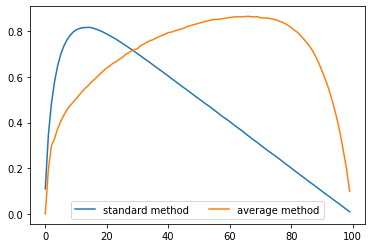

In [38]:
verjetnosti = [x / m for x in vsotke]
verjetnosti_pov = [x / m for x in vsotke_pov]
x = [i for i in range(n)]

plt.plot(x, verjetnosti, label='standard method')
plt.plot(x, verjetnosti_pov, label='average method')
plt.legend(ncol=3)
plt.show()

In [39]:
print("Zgoraj narisani funkciji dosežeta maksimum pri", np.argmax(vsotke), "in", np.argmax(vsotke_pov), ".")

Zgoraj narisani funkciji dosežeta maksimum pri 14 in 66 .


In [40]:
y1 = vsotke
y2 = vsotke_pov
# Finding intersection
intersection_points = []
for i in range(len(x) - 1):
    if (y1[i] - y2[i]) * (y1[i+1] - y2[i+1]) < 0:  # Sign change indicates intersection
        # Linear interpolation to find intersection point
        x_intersect = x[i] - ((y1[i] - y2[i]) * (x[i+1] - x[i]) / (y1[i+1] - y1[i] - y2[i+1] + y2[i]))
        y_intersect = y1[i] + (y1[i+1] - y1[i]) * (x_intersect - x[i]) / (x[i+1] - x[i])
        intersection_points.append((x_intersect, y_intersect))
round(intersection_points[0][0],2)

28.47

Ter se sekata pri zgornji številki.

#### Poglejmo za različne alphe

In [41]:
alf = [2, 1.9, 1.8, 1.7, 1.6]

In [42]:
dovolj_dober = n*(1-p)
velike_vsote = []

for alfa in alf:
    vsotke = [0] * n
    for stop in range(n):
        for i in range(m):
            if fun.NajbolsiPartner_povprecje(tabela_partnerjev[i], stop, alfa) >= dovolj_dober:
                vsotke[stop] += 1
    velike_vsote.append(vsotke)

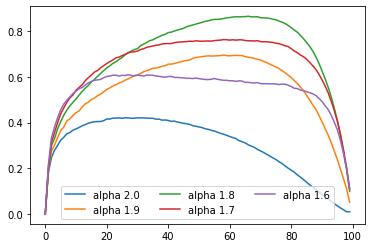

In [43]:
verjetnosti = [x / m for x in vsotke]
x = [i for i in range(n)]

for i in range(5):
    verjetnosti = [x / m for x in velike_vsote[i]]
    plt.plot(x,verjetnosti, label=f'alpha {2-i*0.1}')


plt.legend(ncol=3)
plt.show()

#### Različni p

In [44]:
p_sez = [0.00, 0.05, 0.1, 0.15, 0.2]

In [45]:
alpha = 1.8
velike_vsote = []
velike_vsote_pov = []

for p in p_sez:
    dovolj_dober = n*(1-p)
    vsotke = [0] * n
    vsotke_pov = [0] * n

    for stop in range(n):
        for i in range(m):
            if fun.NajbolsiPartner(tabela_partnerjev[i], stop) >= dovolj_dober:
                vsotke[stop] += 1
            if fun.NajbolsiPartner_povprecje(tabela_partnerjev[i], stop, alpha) >= dovolj_dober:
                vsotke_pov[stop] += 1
                
    velike_vsote.append(vsotke)
    velike_vsote_pov.append(vsotke_pov)

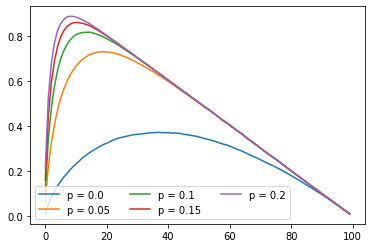

In [46]:
x = [i for i in range(n)]

for i in range(5):
    verjetnosti = [x / m for x in velike_vsote[i]]
    plt.plot(x,verjetnosti, label=f'p = {round(i*0.05,2)}')

plt.legend(ncol=3)
plt.show()

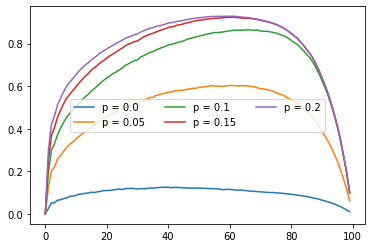

In [47]:
x = [i for i in range(n)]

for i in range(5):
    verjetnosti = [x / m for x in velike_vsote_pov[i]]
    plt.plot(x,verjetnosti, label=f'p = {round(i*0.05,2)}')


plt.legend(ncol=3)
plt.show()

### 5.2

V tem podrazdelku računamo kako dobri so naši rezultati, če smo z vsakim zadovoljni ravno toliko kot je njegova ocena.

In [48]:
n = 100
m = 100000

tabela_partnerjev = {}
for i in range(m):
    partnerji = list(range(1,n+1))
    random.shuffle(partnerji)
    tabela_partnerjev[i] = partnerji

In [49]:
vsotke = [0] * n

for stop in range(n):
    for i in range(m):
        vsotke[stop] += fun.NajbolsiPartner(tabela_partnerjev[i], stop)

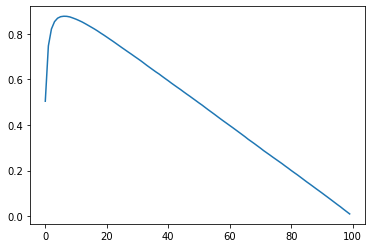

In [50]:
verjetnosti = [x / m /n for x in vsotke]
x = [i for i in range(n)]

plt.plot(x, verjetnosti)
plt.show()

Zgornja slika je od ostalih slik fundamentalno druhgačna, saj na y-osi ni verjetnost pač pa povprečna ocena osebe s katero ostanemo (na intervalu od 0 do 1).

In [51]:
print("Če želimo zaposliti v povprečju najboljšo osebo, se moramo ustaviti pri", np.argmax(vsotke), ".")

Če želimo zaposliti v povprečju najboljšo osebo, se moramo ustaviti pri 6 .


To je drastično drugačna številka od 37 (če smo zadovoljni le z najboljšim).

Pri zgornji verziji, smo lahko na koncu ostali sami. Kako pa se rezultat spremeni, če se na koncu ob neuspešnem iskanju sprijaznimo z zadjo osebo.

In [52]:
vsotke_zadnji = [0] * n

for stop in range(n):
    for i in range(m):
        vsotke_zadnji[stop] += fun.NajbolsiPartner_zadnji(tabela_partnerjev[i], stop)

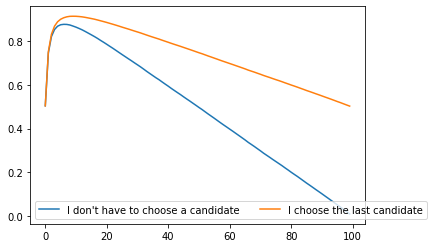

In [53]:
verjetnosti = [x / m /n for x in vsotke]
verjetnosti_zadnji = [x / m /n for x in vsotke_zadnji]
x = [i for i in range(n)]

plt.plot(x, verjetnosti, label = 'I don\'t have to choose a candidate')
plt.plot(x, verjetnosti_zadnji, label = 'I choose the last candidate')
plt.legend(ncol=3)
plt.show()

Poglejmo še podobna rezultata povprečno metodo.

In [54]:
m = 10000

In [55]:
alpha = 1.8
vsotke_pov = [0] * n
vsotke_pov_zadnji = [0] * n

for stop in range(n):
    for i in range(m):
        vsotke_pov[stop] += fun.NajbolsiPartner_povprecje(tabela_partnerjev[i], stop, alpha)
        vsotke_pov_zadnji[stop] += fun.NajbolsiPartner_povprecje_zadnji(tabela_partnerjev[i], stop, alpha)

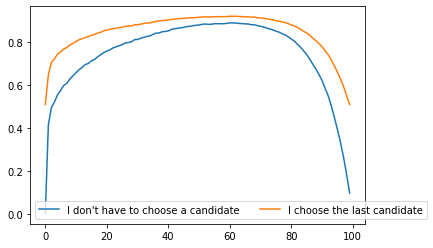

In [56]:
verjetnosti = [x / m /n for x in vsotke_pov]
verjetnosti_zadnji = [x / m /n for x in vsotke_pov_zadnji]
x = [i for i in range(n)]

plt.plot(x, verjetnosti, label = 'I don\'t have to choose a candidate')
plt.plot(x, verjetnosti_zadnji, label = 'I choose the last candidate')
plt.legend(ncol=3)
plt.show()

#### Pogljemo za različne alphe


In [57]:
alf = [2, 1.9, 1.8, 1.7, 1.6]

In [58]:
dovolj_dober = n*(1-p)
velike_vsote = []

for alfa in alf:
    vsotke = [0] * n
    for stop in range(n):
        for i in range(m):
                vsotke[stop] += fun.NajbolsiPartner_povprecje(tabela_partnerjev[i], stop, alfa)
    velike_vsote.append(vsotke)

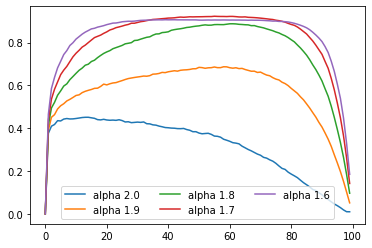

In [59]:
verjetnosti = [x / m /n for x in vsotke]
x = [i for i in range(n)]

for i in range(5):
    verjetnosti = [x / m /n for x in velike_vsote[i]]
    plt.plot(x,verjetnosti, label=f'alpha {2-i*0.1}')


plt.legend(ncol=3)
plt.show()